In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from sqlalchemy import create_engine

# Extract CSVs into DataFrames

In [19]:
# read csv file Oceania 
oceania_csv = "static/Data/oceania.csv"

In [20]:
# Create dataframe
oceania_df = pd.read_csv(oceania_csv)
oceania_df.head()

,Date,Apple,Samsung,Huawei,Oppo,Google,Xiaomi,Unknown,Nokia,Motorola,...,Alcatel,HTC,Asus,Vodafone,ZTE,Honor,BBK,Tecno,Infinix,Other
0,2021-05,52.73,25.01,9.55,4.27,1.56,1.73,1.22,0.64,0.54,...,0.08,0.12,0.09,0.06,0.07,0.05,0.03,0.01,0.01,0.11
1,2021-06,53.22,24.79,9.31,4.25,1.55,1.72,1.32,0.63,0.55,...,0.07,0.11,0.09,0.06,0.06,0.04,0.03,0.01,0.01,0.11
2,2021-07,53.67,24.67,9.29,4.15,1.48,1.66,1.33,0.59,0.55,...,0.06,0.10,0.08,0.05,0.05,0.04,0.03,0.01,0.01,0.10
3,2021-08,52.27,26.80,8.90,4.17,1.42,1.67,1.02,0.59,0.55,...,0.06,0.10,0.08,0.05,0.05,0.04,0.02,0.02,0.01,0.10
4,2021-09,52.78,27.02,8.15,4.13,1.45,1.69,1.04,0.61,0.56,...,0.06,0.10,0.07,0.05,0.06,0.03,0.02,0.01,0.01,0.09


In [21]:
# Performing a .count to make sure that the data is complete
print(oceania_df.count())

Date        13
Apple       13
Samsung     13
Huawei      13
Oppo        13
Google      13
Xiaomi      13
Unknown     13
Nokia       13
Motorola    13
OnePlus     13
Lenovo      13
Vivo        13
Realme      13
LG          13
Sony        13
Alcatel     13
HTC         13
Asus        13
Vodafone    13
ZTE         13
Honor       13
BBK         13
Tecno       13
Infinix     13
Other       13
dtype: int64


In [22]:
# read csv file South America
southamerica_csv = "static/Data/south america.csv"

In [23]:
# Create dataframe
southamerica_df = pd.read_csv(southamerica_csv)
southamerica_df.head()

,Date,Samsung,Motorola,Xiaomi,Apple,Huawei,LG,Unknown,Asus,Nokia,...,Oppo,Mixc,OnePlus,Google,Infinix,Blu,Honor,HTC,Meizu,Other
0,2021-05,45.41,16.98,9.51,10.70,8.37,4.59,0.98,0.74,0.50,...,0.03,0.0,0.09,0.05,0.02,0.06,0.04,0.03,0.01,0.16
1,2021-06,44.91,17.08,9.77,10.90,8.46,4.41,1.09,0.73,0.49,...,0.03,0.0,0.08,0.05,0.02,0.05,0.04,0.03,0.01,0.15
2,2021-07,44.86,17.40,9.99,11.28,7.58,4.44,1.10,0.77,0.48,...,0.03,0.0,0.08,0.05,0.02,0.05,0.03,0.02,0.01,0.14
3,2021-08,45.33,17.18,10.65,10.66,7.26,4.78,0.70,0.71,0.48,...,0.05,0.0,0.08,0.05,0.04,0.05,0.03,0.02,0.01,0.13
4,2021-09,45.04,17.13,11.09,10.72,7.23,4.55,0.75,0.66,0.49,...,0.07,0.0,0.08,0.05,0.05,0.04,0.03,0.02,0.01,0.13


In [24]:
# Performing a .count to make sure that the data is complete
print(southamerica_df.count())

Date        13
Samsung     13
Motorola    13
Xiaomi      13
Apple       13
Huawei      13
LG          13
Unknown     13
Asus        13
Nokia       13
ZTE         13
Alcatel     13
Lenovo      13
Realme      13
Tecno       13
Sony        13
Vivo        13
Oppo        13
Mixc        13
OnePlus     13
Google      13
Infinix     13
Blu         13
Honor       13
HTC         13
Meizu       13
Other       13
dtype: int64


In [25]:
#Run this code to find the pairwise correlation of all columns in the dataframe
#This allows the creation of the heatmap below
corr_data=oceania_df.corr()
corr_data

,Apple,Samsung,Huawei,Oppo,Google,Xiaomi,Unknown,Nokia,Motorola,OnePlus,...,Alcatel,HTC,Asus,Vodafone,ZTE,Honor,BBK,Tecno,Infinix,Other
Apple,1.000000,0.478236,-0.650522,-0.843075,0.555139,-0.735092,-0.292063,0.446786,0.437901,-0.692810,...,0.508801,-0.833485,-0.292128,-0.649651,-0.718456,-0.643693,-0.484529,0.239575,0.294216,-0.662486
Samsung,0.478236,1.000000,-0.967190,-0.801238,0.817286,-0.871949,-0.402471,0.895809,0.904984,-0.940613,...,0.880055,-0.642957,0.144296,-0.786253,-0.689619,-0.935002,-0.882230,0.850863,0.766231,-0.326663
Huawei,-0.650522,-0.967190,1.000000,0.859644,-0.888996,0.925444,0.303404,-0.923501,-0.926024,0.961900,...,-0.919416,0.713122,-0.147305,0.796411,0.742445,0.948893,0.849444,-0.829449,-0.788481,0.358688
Oppo,-0.843075,-0.801238,0.859644,1.000000,-0.690964,0.871746,0.548486,-0.639371,-0.630966,0.896017,...,-0.688453,0.852131,0.200801,0.804087,0.780294,0.857515,0.708295,-0.513515,-0.519396,0.631302
Google,0.555139,0.817286,-0.888996,-0.690964,1.000000,-0.863635,-0.086900,0.891131,0.832397,-0.762631,...,0.967775,-0.420501,0.462815,-0.479264,-0.487313,-0.774820,-0.638738,0.819254,0.795476,0.007661
Xiaomi,-0.735092,-0.871949,0.925444,0.871746,-0.863635,1.000000,0.352870,-0.814024,-0.775028,0.903167,...,-0.905374,0.691438,-0.084726,0.760389,0.730025,0.906967,0.803069,-0.704343,-0.570713,0.380741
Unknown,-0.292063,-0.402471,0.303404,0.548486,-0.086900,0.352870,1.000000,-0.028213,-0.040505,0.418350,...,-0.112039,0.521392,0.499054,0.416700,0.352415,0.349259,0.488865,-0.065043,0.025032,0.641042
Nokia,0.446786,0.895809,-0.923501,-0.639371,0.891131,-0.814024,-0.028213,1.000000,0.939269,-0.827323,...,0.946607,-0.485881,0.351487,-0.644383,-0.546911,-0.844152,-0.701202,0.839664,0.800978,-0.064742
Motorola,0.437901,0.904984,-0.926024,-0.630966,0.832397,-0.775028,-0.040505,0.939269,1.000000,-0.857537,...,0.871818,-0.557173,0.320004,-0.712644,-0.668722,-0.843544,-0.810236,0.920292,0.884504,-0.174358
OnePlus,-0.692810,-0.940613,0.961900,0.896017,-0.762631,0.903167,0.418350,-0.827323,-0.857537,1.000000,...,-0.814307,0.821901,0.062798,0.881784,0.839722,0.970737,0.867432,-0.720198,-0.668440,0.543054


In [26]:
#Run this code to find the pairwise correlation of all columns in the dataframe
#This allows the creation of the heatmap below
corr_data=southamerica_df.corr()
corr_data

,Samsung,Motorola,Xiaomi,Apple,Huawei,LG,Unknown,Asus,Nokia,ZTE,...,Oppo,Mixc,OnePlus,Google,Infinix,Blu,Honor,HTC,Meizu,Other
Samsung,1.000000e+00,-8.807622e-01,-0.862570,2.481760e-01,9.078430e-01,-5.580746e-01,6.253744e-01,7.384121e-01,2.285957e-01,7.704999e-01,...,-7.204249e-01,-0.774077,3.543512e-01,-2.756214e-01,-7.217894e-01,8.578537e-01,5.346515e-01,4.692776e-02,-4.629229e-15,8.696570e-01
Motorola,-8.807622e-01,1.000000e+00,0.694121,-6.514050e-01,-8.199183e-01,8.536860e-01,-7.191555e-01,-4.976788e-01,-7.686335e-03,-9.427951e-01,...,4.797040e-01,0.730221,-3.775351e-01,1.496744e-01,5.135117e-01,-6.713480e-01,-6.377852e-01,-1.563894e-02,-2.007981e-16,-6.976361e-01
Xiaomi,-8.625700e-01,6.941211e-01,1.000000,-9.112097e-02,-9.673684e-01,3.461822e-01,-7.389686e-01,-8.937905e-01,-4.446502e-01,-6.289363e-01,...,9.355546e-01,0.833576,-5.359809e-01,2.035324e-01,9.256518e-01,-9.738707e-01,-4.368797e-01,4.265149e-02,0.000000e+00,-9.746510e-01
Apple,2.481760e-01,-6.514050e-01,-0.091121,1.000000e+00,2.223976e-01,-8.906770e-01,5.140203e-01,-2.201311e-02,-5.310697e-01,6.593158e-01,...,1.076415e-01,-0.259000,1.357882e-01,2.681013e-01,6.681798e-02,4.500712e-02,3.904961e-01,-9.325726e-02,1.051218e-15,5.013852e-02
Huawei,9.078430e-01,-8.199183e-01,-0.967368,2.223976e-01,1.000000e+00,-4.952145e-01,7.632103e-01,7.905708e-01,4.291798e-01,7.710386e-01,...,-8.559395e-01,-0.865546,5.535099e-01,-2.411184e-01,-8.677909e-01,9.432023e-01,5.408121e-01,-2.317746e-02,8.876969e-16,9.638077e-01
LG,-5.580746e-01,8.536860e-01,0.346182,-8.906770e-01,-4.952145e-01,1.000000e+00,-6.603720e-01,-1.295044e-01,3.273245e-01,-8.477830e-01,...,7.000256e-02,0.349754,-2.537761e-01,-1.694993e-01,9.144503e-02,-3.109286e-01,-6.688534e-01,-1.271843e-01,-1.075239e-15,-3.147789e-01
Unknown,6.253744e-01,-7.191555e-01,-0.738969,5.140203e-01,7.632103e-01,-6.603720e-01,1.000000e+00,5.758247e-01,1.894860e-01,7.497957e-01,...,-5.484645e-01,-0.588446,4.241444e-01,-1.981524e-01,-5.579240e-01,6.341547e-01,6.424953e-01,2.068799e-01,2.495948e-16,6.814600e-01
Asus,7.384121e-01,-4.976788e-01,-0.893791,-2.201311e-02,7.905708e-01,-1.295044e-01,5.758247e-01,1.000000e+00,2.465972e-01,3.500580e-01,...,-9.492153e-01,-0.780806,2.288662e-01,-1.774678e-01,-9.165925e-01,8.607197e-01,1.506251e-01,-1.756468e-01,-7.474748e-16,8.745438e-01
Nokia,2.285957e-01,-7.686335e-03,-0.444650,-5.310697e-01,4.291798e-01,3.273245e-01,1.894860e-01,2.465972e-01,1.000000e+00,7.204485e-02,...,-4.622352e-01,-0.344336,5.273280e-01,-5.383451e-01,-5.068961e-01,4.701298e-01,1.567339e-01,5.723112e-02,1.435207e-15,4.845824e-01
ZTE,7.704999e-01,-9.427951e-01,-0.628936,6.593158e-01,7.710386e-01,-8.477830e-01,7.497957e-01,3.500580e-01,7.204485e-02,1.000000e+00,...,-3.710218e-01,-0.639837,4.995258e-01,-1.725749e-01,-4.149187e-01,5.762529e-01,7.164287e-01,1.721071e-01,1.208479e-15,6.245209e-01


# Create graphs to show correlation between different variables in the Data Set

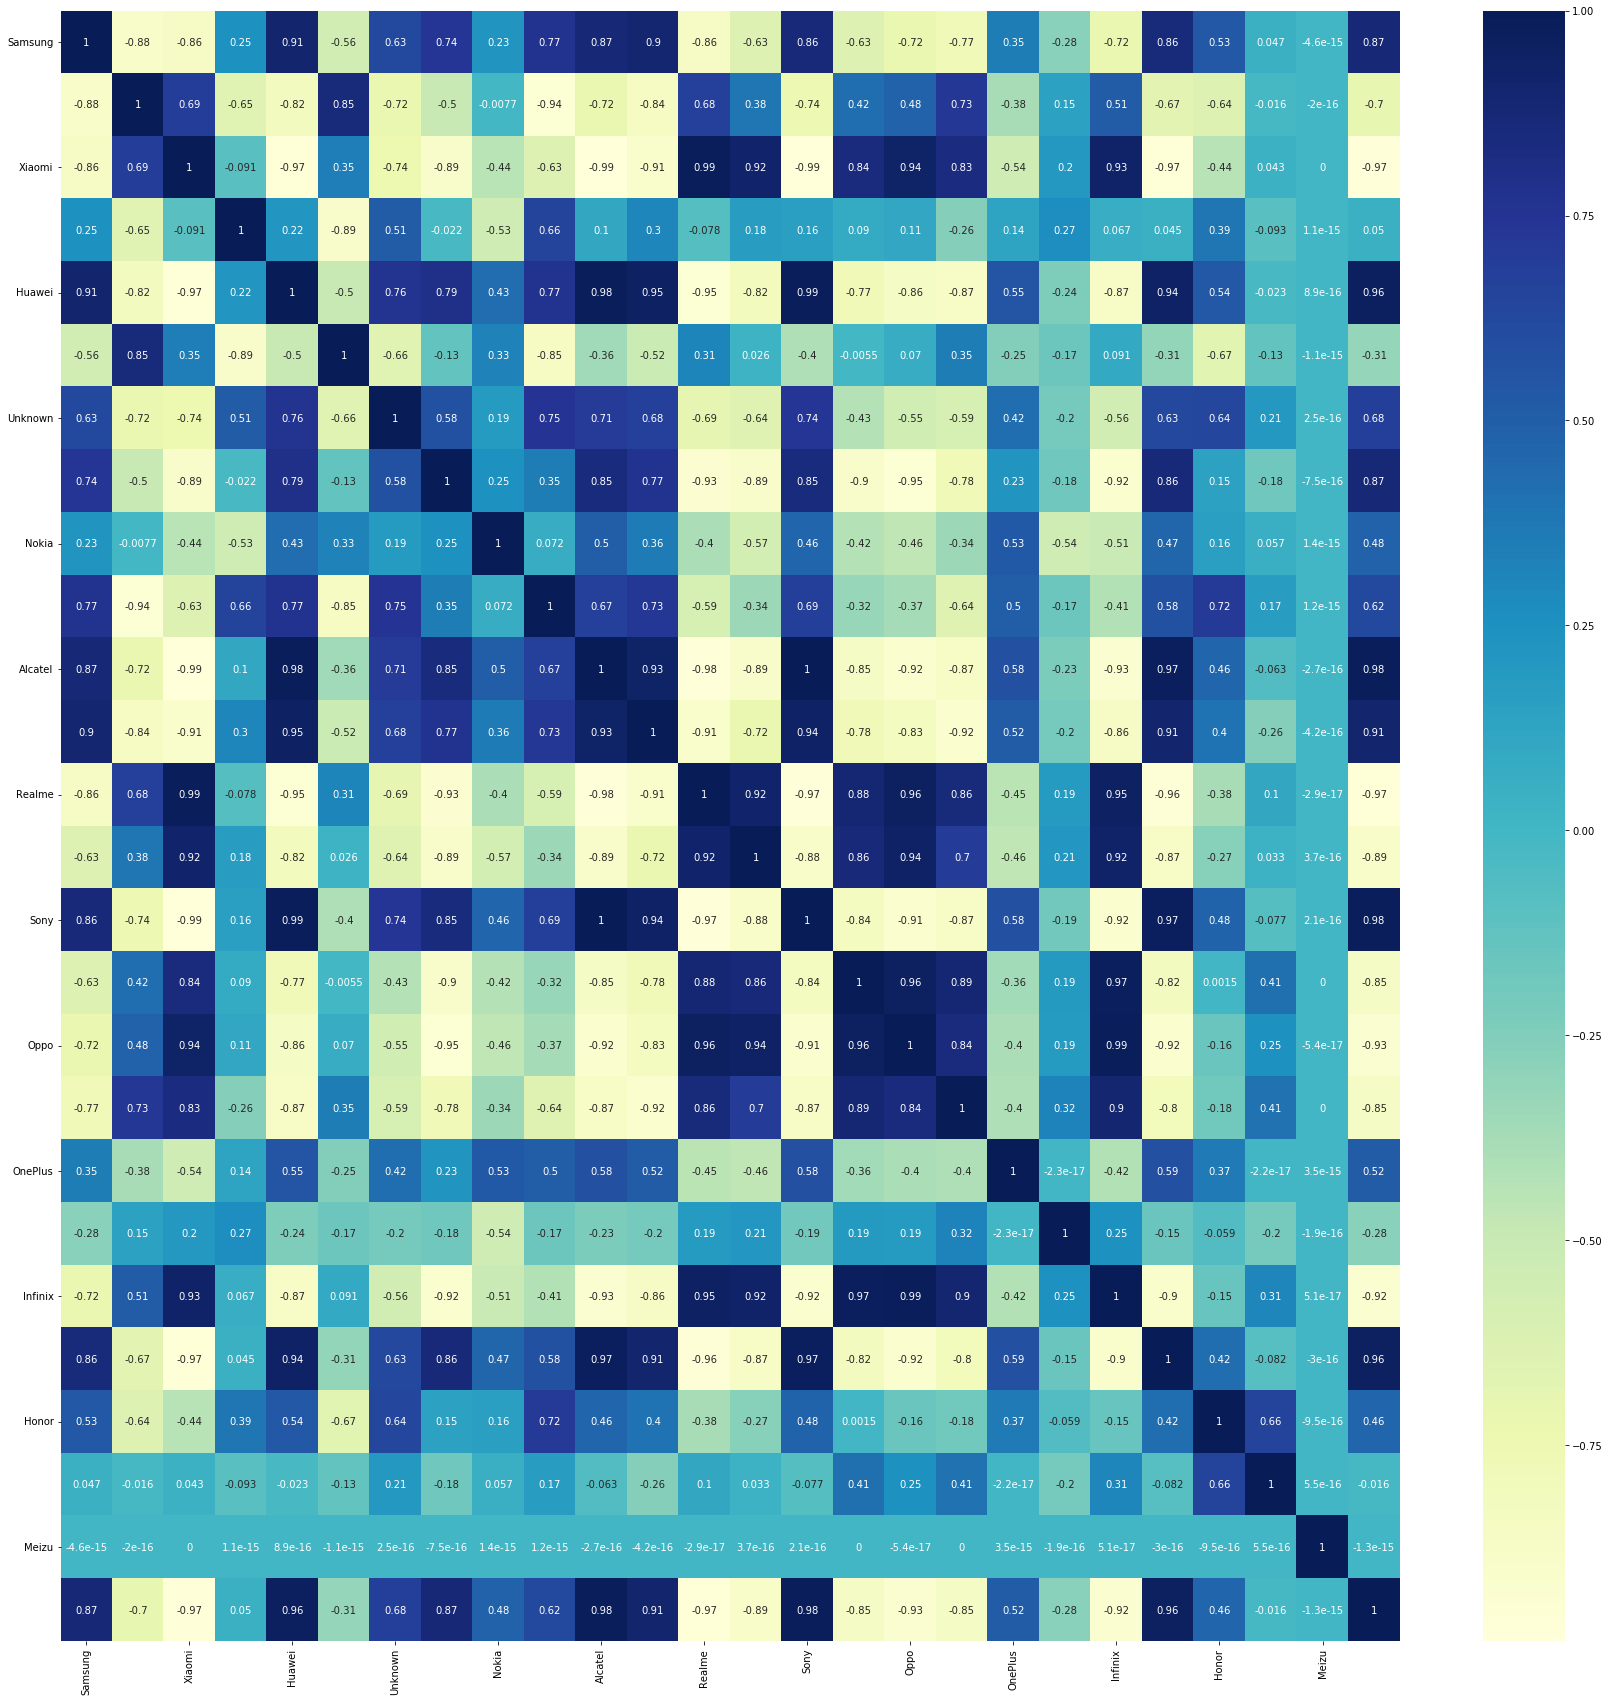

In [27]:
#Shows correlation between all variables against each other
#need to install seaborn in order to plot heatmap
sns.heatmap(corr_data, annot=True,cmap="YlGnBu")
plt.gcf().set_size_inches(30, 30)
plt.savefig("static/Img/worldwideheatmap.png")
plt.show()

# Part 2: MongoDB

In [28]:
import pymongo

In [29]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [30]:
# Declare the database for Africa
db = client.phonebrand

In [31]:
#Insert the scraped_data in the database
oceania_dict = oceania_df.to_dict("records")

In [32]:
#Insert data
db.oceania.insert_many(oceania_dict)

In [33]:
#Insert the scraped_data in the database
southamerica_dict = southamerica_df.to_dict("records")

In [34]:
#Insert data
db.southamerica.insert_many(southamerica_dict)